# Library

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
from prml.utils.datasets import ClassificationDataGenerator2,RegressionDataGenerator
from prml.sparse_kernel_machines import (
    SupportVectorMachineClassifier,
    RelevanceVectorMachineRegressor,
    RelevanceVectorMachineClassifier
) 

In [2]:
def f(x):
    return x*x*x - 3*x

def g(x):
    return np.sin(x)

cmaps = [[0.122, 0.467, 0.706],"orange","green"]

# Support Vector Machine 

In [3]:
gen = ClassificationDataGenerator2(f)
n_data = 200
X_tr,y_tr = gen(encoding="label",x_lower=-3,x_upper=3,y_lower=-3,y_upper=3,n=n_data)  

svm = SupportVectorMachineClassifier(C=100.0,kernel="Gaussian",sigma=0.5)
svm.fit(X_tr,y_tr)
print(f"number of support vector {svm.number_of_support_vector()}")
print(f"number of data {n_data}")

cmap = ListedColormap(["red","blue"])

# prepare data 
x_min,y_min = X_tr.min(axis = 0)
x_max,y_max = X_tr.max(axis = 0) 
x_min,y_min = x_min-0.1,y_min-0.1
x_max,y_max = x_max+0.1,y_max+0.1
x = np.linspace(x_min,x_max,100)
y = np.linspace(y_min,y_max,100) 
xs,ys = np.meshgrid(x,y)

# predict 
labels = svm.predict(np.array([xs.ravel(),ys.ravel()]).T)
labels = labels.reshape(xs.shape)

number of support vector 64
number of data 200


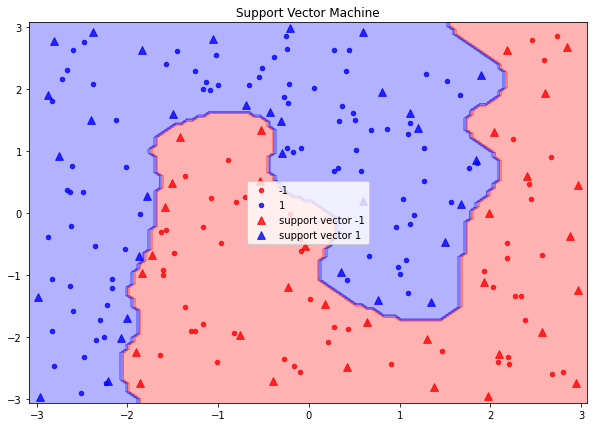

In [4]:
# plot 
figure,axes = plt.subplots(1,1,figsize=(10,7))
axes.contourf(xs,ys,labels,alpha=0.3,cmap=cmap)
axes.set_xlim(x_min,x_max)
axes.set_ylim(y_min,y_max)

ind_support_vector = svm.index_of_support_vector() 
not_support_vector = np.logical_not(np.isin(np.arange(n_data),ind_support_vector))
X_notsv,y_notsv = X_tr[not_support_vector],y_tr[not_support_vector]
X_sv,y_sv = X_tr[ind_support_vector],y_tr[ind_support_vector] 
axes.scatter(x=X_notsv[y_notsv == -1,0],y=X_notsv[y_notsv == -1,1],alpha=0.8,c="red",label=-1,s=20)
axes.scatter(x=X_notsv[y_notsv == 1,0],y=X_notsv[y_notsv == 1,1],alpha=0.8,c="blue",label=1,s=20)

axes.scatter(x=X_sv[y_sv == -1,0],y=X_sv[y_sv == -1,1],alpha=0.8,c="red",label=f"support vector {-1}",marker="^",s=60)
axes.scatter(x=X_sv[y_sv == 1,0],y=X_sv[y_sv == 1,1],alpha=0.8,c="blue",label=f"support vector {1}",marker="^",s=60)

axes.set_title("Support Vector Machine")
plt.legend()
plt.show()

# Relevance Vector Machine Regressor

number of relevance vector: 8
number of daat: 100
RMSE : 0.04091119804863553


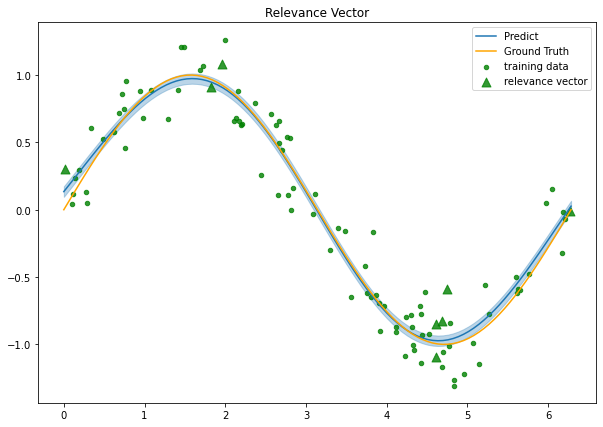

In [5]:
# training 
n_data = 100
rvm = RelevanceVectorMachineRegressor(kernel="Gaussian",sigma=2,max_iter=1000) 
generator = RegressionDataGenerator(g)

X_tr,y_tr = generator(lower=0,upper=2*np.pi,std=0.2,n=n_data)  
rvm.fit(X_tr,y_tr,optimize_param=True) 
print(f"number of relevance vector: {rvm.number_of_relevance_vector()}")
print(f"number of daat: {n_data}")

# inference
X = np.linspace(0,2*np.pi,100).reshape(-1,1)
y_pred,y_std = rvm.predict(X,return_std=True)
y_true = g(X)

rmse = np.mean((y_pred - y_true)**2)**0.5
print(f"RMSE : {rmse}")

fig,ax = plt.subplots(1,1,figsize = (10,7))
ax.plot(X,y_pred,label="Predict",color=cmaps[0])

y_pred_upper = y_pred + y_std
y_pred_lower = y_pred - y_std 
ax.fill_between(X.ravel(),y_pred_lower.ravel(),y_pred_upper.ravel(),alpha=0.3,color=cmaps[0])

ax.plot(X,y_true,label="Ground Truth",color=cmaps[1])
ax.set_title("Relevance Vector")

ind_relevance_vector = rvm.index_of_relevance_vector()
not_relevance_vector = np.logical_not(np.isin(np.arange(n_data),ind_relevance_vector))
X_notrv,y_notrv = X_tr[not_relevance_vector],y_tr[not_relevance_vector]
X_rv,y_rv = X_tr[ind_relevance_vector],y_tr[ind_relevance_vector] 
ax.scatter(x=X_notrv[:,0],y=y_notrv[:,0],alpha=0.8,c=cmaps[2],label="training data",s=20)
ax.scatter(x=X_rv[:,0],y=y_rv[:,0],alpha=0.8,c=cmaps[2],label=f"relevance vector",marker="^",s=80)

plt.legend()
plt.show()

# Relevance Vector Machine Classifier 

Number of relevance vector: 14
Number of data: 50


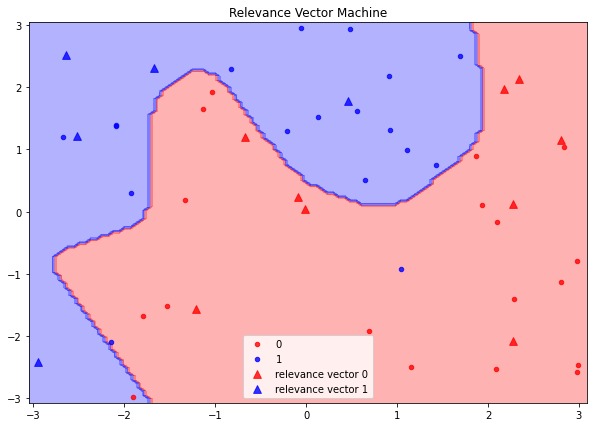

In [8]:
en = ClassificationDataGenerator2(f)
n_data = 50
X_tr,y_tr = gen(encoding="label",x_lower=-3,x_upper=3,y_lower=-3,y_upper=3,n=n_data)  
#X_tr,y_tr = gen(encoding="label",x_lower=0,x_upper=7,y_lower=0,y_upper=7,n=n_data)  

rvm = RelevanceVectorMachineClassifier(max_iter=100,threshold=1e-8,kernel="Gaussian",sigma=0.5)
rvm.fit(X_tr,y_tr)

print(f"Number of relevance vector: {rvm.number_of_relevance_vector()}")
print(f"Number of data: {n_data}")
cmap = ListedColormap(["red","blue"])

# prepare data 
x_min,y_min = X_tr.min(axis = 0)
x_max,y_max = X_tr.max(axis = 0) 
x_min,y_min = x_min-0.1,y_min-0.1
x_max,y_max = x_max+0.1,y_max+0.1
x = np.linspace(x_min,x_max,100)
y = np.linspace(y_min,y_max,100) 
xs,ys = np.meshgrid(x,y)

# predict 
labels = rvm.predict(np.array([xs.ravel(),ys.ravel()]).T)
labels = labels.reshape(xs.shape)

figure,axes = plt.subplots(1,1,figsize=(10,7))
axes.contourf(xs,ys,labels,alpha=0.3,cmap=cmap)
axes.set_xlim(x_min,x_max)
axes.set_ylim(y_min,y_max)

ind_relevance_vector = rvm.index_of_relevance_vector() 
not_relevance_vector = np.logical_not(np.isin(np.arange(n_data),ind_relevance_vector))
X_notrv,y_notrv = X_tr[not_relevance_vector],y_tr[not_relevance_vector]
X_rv,y_rv = X_tr[ind_relevance_vector],y_tr[ind_relevance_vector] 
axes.scatter(x=X_notrv[y_notrv == 0,0],y=X_notrv[y_notrv == 0,1],alpha=0.8,c="red",label=0,s=20)
axes.scatter(x=X_notrv[y_notrv == 1,0],y=X_notrv[y_notrv == 1,1],alpha=0.8,c="blue",label=1,s=20)

axes.scatter(x=X_rv[y_rv == 0,0],y=X_rv[y_rv == 0,1],alpha=0.8,c="red",label=f"relevance vector {0}",marker="^",s=60)
axes.scatter(x=X_rv[y_rv == 1,0],y=X_rv[y_rv == 1,1],alpha=0.8,c="blue",label=f"relevance vector {1}",marker="^",s=60)

axes.set_title("Relevance Vector Machine")
plt.legend()
plt.show()